# COMP0005 - GROUP COURSEWORK
# Experimental Evaluation of Search Data Structures and Algorithms

The cell below defines **AbstractSearchInterface**, an interface to support basic insert/search operations; you will need to implement this three times, to realise your three search data structures of choice among: (1) *2-3 Tree*, (2) *AVL Tree*, (3) *LLRB BST*; (4) *B-Tree*; and (5) *Scapegoat Tree*. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [11]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

class AbstractSearchInterface(ABC):
    '''
    Abstract class to support search/insert operations (plus underlying data structure)
    
    '''
        
    @abstractmethod
    def insertElement(self, element):     
        '''
        Insert an element in a search tree
            Parameters:
                    element: string to be inserted in the search tree (string)

            Returns:
                    "True" after successful insertion, "False" if element is already present (bool)
        '''
        
        pass 
    

    @abstractmethod
    def searchElement(self, element):
        '''
        Search for an element in a search tree
            Parameters:
                    element: string to be searched in the search tree (string)

            Returns:
                    "True" if element is found, "False" otherwise (bool)
        '''

        pass

Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [12]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE
class Node: 
    def __init__(self, element): 
        self.left = None
        self.right = None
        self.parent = None
        self.element = element
        
class Node1:
    def __init__(self):
        self.keys = []
        self.children = []

    def is_leaf(self):
        return len(self.children) == 0

    def insert_key(self, key):
        # Insert key into the keys list in sorted order
        index = 0
        while index < len(self.keys) and key > self.keys[index]:
            index += 1
        self.keys.insert(index, key)

    def split(self):
        # Split the node into two nodes and return the middle key
        mid_index = len(self.keys) // 2
        mid_key = self.keys[mid_index]

        left = Node1()
        left.keys = self.keys[:mid_index]

        right = Node1()
        right.keys = self.keys[mid_index + 1:]

        if not self.is_leaf():
            # Split the children accordingly
            left.children = self.children[:mid_index + 1]
            right.children = self.children[mid_index + 1:]

        return mid_key, left, right
        
class LLRBNode:
    def __init__(self, key, color, left=None, right=None):
        self.key = key
        self.color = color  # True indicates red, False indicates black
        self.left = left
        self.right = right
        



Use the cell below to implement the requested API by means of **2-3 Tree** (if among your chosen data structure).

In [ ]:
class TwoThreeTree:
    def __init__(self):
        self.root = Node1()

    def searchElement(self, key):
        node = self.root
        while node:
            found = False
            for i in range(len(node.keys)):
                if key == node.keys[i]:
                    return True
                elif key < node.keys[i]:
                    if node.is_leaf():
                        return False
                    node = node.children[i]
                    found = True
                    break
            if not found:
                if node.is_leaf():
                    return False
                node = node.children[-1]
        return False

    def insertElement(self, key):
        split_result = self._insert(self.root, key)
        if split_result:
            # Root needs to split
            mid_key, left, right = split_result
            new_root = Node1()
            new_root.keys.append(mid_key)
            new_root.children.append(left)
            new_root.children.append(right)
            self.root = new_root

    def _insert(self, node, key):
        if node.is_leaf():
            node.insert_key(key)
            if len(node.keys) > 2:
                return node.split()
            return None
        else:
            # Find the appropriate child to insert
            child_index = 0
            while child_index < len(node.keys) and key >= node.keys[child_index]:
                child_index += 1

            split_result = self._insert(node.children[child_index], key)
            if split_result:
                mid_key, left, right = split_result

                # Insert the mid_key into current node
                insert_index = 0
                while insert_index < len(node.keys) and mid_key > node.keys[insert_index]:
                    insert_index += 1
                node.keys.insert(insert_index, mid_key)

                # Replace the child with left and right
                node.children.pop(child_index)
                node.children.insert(child_index, right)
                node.children.insert(child_index, left)

                if len(node.keys) > 2:
                    return node.split()
            return None
        
    def height(self):
        """Calculate the height of the 2-3 tree."""
        if not self.root.keys:  # if root null, height is 0
            return 0
        return self._height(self.root)

    def _height(self, node):
        """Helper method to recursively calculate height."""
        if node.is_leaf():
            return 1  
       
        return 1 + max(self._height(child) for child in node.children)

In [14]:
class AVLTree(AbstractSearchInterface):
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
      
        
        return inserted
    
    

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE

        
        return found  

Use the cell below to implement the requested API by means of **LLRB BST** (if among your chosen data structure).

In [15]:


class LLRBTree:
    def __init__(self):
        self.root = None

    def is_red(self, node):
        return node is not None and node.color
    
    def _rotate_left(self, h:LLRBNode):
        x = h.right
        h.right = x.left
        x.left = h
        x.color = h.color
        h.color = True
        return x

    def _rotate_right(self, h):
        x = h.left
        h.left = x.right
        x.right = h
        x.color = h.color
        h.color = True
        return x

    def _flip_colors(self, h):
        h.color = not h.color
        if h.left:
            h.left.color = not h.left.color
        if h.right:
            h.right.color = not h.right.color

    def _insert(self, h, key):
        if h is None:
            return LLRBNode(key, True)
        if key == h.key:
            return h  # Ignore duplicates
        if key < h.key:
            h.left = self._insert(h.left, key)
        elif key > h.key:
            h.right = self._insert(h.right, key)
        if self.is_red(h.right) and not self.is_red(h.left):
            h = self._rotate_left(h)
        if self.is_red(h.left) and self.is_red(h.left.left):
            h = self._rotate_right(h)
        if self.is_red(h.left) and self.is_red(h.right):
            self._flip_colors(h)
        return h

    def insertElement(self, key):
        self.root = self._insert(self.root, key)
        self.root.color = False

    def searchElement(self, key):
        return self._search(self.root, key)

    def _search(self, node, key):
        if node is None:
            return False
        if key < node.key:
            return self._search(node.left, key)
        elif key > node.key:
            return self._search(node.right, key)
        else:
            return True
    
    def height(self):
        return self._height(self.root)

    def _height(self, node):
        if node is None:
            return 0
        return 1 + max(self._height(node.left), self._height(node.right))

Use the cell below to implement the requested API by means of **B-Tree** (if among your chosen data structure).

In [16]:
class BTree(AbstractSearchInterface):
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
      
        
        return inserted
    
    

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE

        
        return found

Use the cell below to implement the requested API by means of **Scapegoat Tree** (if among your chosen data structure).

In [17]:
# DO NOT MODIFY THIS CELL

import math
from collections import deque





# < works on strings

class ScapegoatTree(AbstractSearchInterface):
    
    def __init__(self):
        self.totalSize = 0
        self.root = None
    
    # Level-order traversal
    def displayLevelOrder(self):
        if self.root is None:
            print("Tree is empty")
            return
        
        queue = deque([self.root])
        
        while queue:
            node = queue.popleft()
            print(node.element, end=" ")
            
            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)
        print()

    def displayTree(self, node, level=0):
        if node is not None:
            self.displayTree(node.right, level + 1)
            print("   " * level + f"({node.element})")
            self.displayTree(node.left, level + 1)

    def preorderTraverse(self, node): 
        if node: 
            self.preorderTraverse(node.left) 
            self.preorderTraverse(node.right) 
        
    def getSize(self, node):
        if node == None:
            return 0
        return 1 + self.getSize(node.left) + self.getSize(node.right)
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE

        newNode = Node(element)

        if self.root == None:
            self.root = newNode
            self.totalSize += 1
            return True
    
        currNode = self.root
        treeDepth = 0

        while currNode:
            parentNode = currNode
            treeDepth += 1
            if newNode.element < currNode.element:
                currNode = currNode.left
            elif newNode.element > currNode.element:
                currNode = currNode.right
            else:
                print("Element already in tree")
                return False
        
        newNode.parent = parentNode
        if newNode.element < parentNode.element:
            parentNode.left = newNode
        else:
            parentNode.right = newNode
        
        self.totalSize +=1


        if treeDepth > (2.4663034623764317 * math.log(self.totalSize, 3)): # scapegoat tree balancing condition

            #find scapegoat
            while (3*self.getSize(parentNode) <= 2* self.getSize(parentNode.parent)):
                parentNode = parentNode.parent # moves up the tree
            self.rebuild(parentNode.parent) 


        return True
    
    def rebuild(self, scapegoat):
        subtreeSize = self.getSize(scapegoat)
        parentNode = scapegoat.parent
        array = [None]*subtreeSize

        self.flattenSubtree(scapegoat,array, 0)
        for node in array:
            print(node.element)

        #attaching rebuilt subtree
        if parentNode is None:
            self.root = self.buildNewSubtree(array, 0, subtreeSize)
            self.root.parent = None
        elif parentNode.right == scapegoat:
            parentNode.right = self.buildNewSubtree(array, 0, subtreeSize)
            parentNode.right.parent = parentNode
        else:
            parentNode.left = self.buildNewSubtree(array, 0, subtreeSize)
            parentNode.left.parent = parentNode

    def buildNewSubtree(self, array, index, size):
        if size == 0:
            return None

        centre = size // 2

        node = array[index + centre]
        
        node.left = self.buildNewSubtree(array, index, centre)
        if node.left:
            node.left.parent = node
        
        node.right = self.buildNewSubtree(array, index + centre + 1, size - centre - 1)
        if node.right:
            node.right.parent = node
        
        return node

    
    def flattenSubtree(self, node, array, index):
        if node is None:
            return index
        index = self.flattenSubtree(node.left, array, index)

        array[index] = node
        index +=1

        index = self.flattenSubtree(node.right, array, index)
        return index

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE

        currNode = self.root

        while currNode:
            if element < currNode.element:
                currNode = currNode.left
            elif element > currNode.element:
                currNode = currNode.right
            else:
                found = True
                break

        return found 

    def height(self):
        return self._height(self.root)

    def _height(self, node):
        if node is None:
            return 0
        return 1 + max(self._height(node.left), self._height(node.right))

 

Use the cell below to implement the **synthetic data generator** needed by your experimental framework (be mindful of code readability and reusability).

In [ ]:
import random
import string

class TestDataGenerator:
    def __init__(self, data_size=4000, string_length=8, distribution="random"):
        """
        Parameters
        ----------
        data_size : int
            Number of strings to generate (default 2000).
        string_length : int
            Length of each string (default 8).
        distribution : str
            'random', 'sorted', 'almost_sorted', or 'repetitive'.
        """
        self.data_size = data_size
        self.string_length = string_length
        self.distribution = distribution
        self.alphabet = string.ascii_lowercase

    def generate_data(self):
        """Generate and return a list of strings based on the distribution."""
        if self.distribution == "random":
            return self._generate_random_strings()
        elif self.distribution == "sorted":
            return sorted(self._generate_random_strings())
        elif self.distribution == "almost_sorted":
            return self._generate_almost_sorted_strings()
        elif self.distribution == "repetitive":
            return self._generate_repetitive_strings()
        # edge case: same  string
        elif self.distribution == "all_same":
            return self._generate_all_same_strings()
        # edge case: reverse order
        elif self.distribution == "reverse_sorted":
            return sorted(self._generate_random_strings(), reverse=True)
        else:
            return self._generate_random_strings()

    def _generate_random_strings(self):
        """Generate random strings with minimal collision checks."""
        data = []
        seen = set()
        for _ in range(self.data_size):
            while True:
                s = ''.join(random.choices(self.alphabet, k=self.string_length))
                if s not in seen:
                    seen.add(s)
                    data.append(s)
                    break
        return data

    '''def _generate_almost_sorted_strings(self):
        """Generate almost sorted strings by perturbing sorted random strings."""
        data = sorted(self._generate_random_strings())
        for _ in range(3):  
            i, j = random.sample(range(self.data_size), 2)
            data[i], data[j] = data[j], data[i]
        return data'''
    def _generate_almost_sorted_strings(self):
        """Generate almost sorted strings by perturbing sorted random strings."""
        data = sorted(self._generate_random_strings())
        for _ in range(min(3, self.data_size // 2)):  # dynamically adjust swap times
            i, j = random.sample(range(self.data_size), 2)
            data[i], data[j] = data[j], data[i]
        return data

    '''def _generate_repetitive_strings(self):
        # ensure uniqueness
        unique_count = self.data_size
        unique_strings = self._generate_random_strings()[:unique_count]
        return unique_strings'''
    def _generate_repetitive_strings(self):
        """生成具有一定重复性的唯一字符串，但限制重复度以保持测试意义"""
        unique_count = max(1, self.data_size // 10)  # 10% unique string
        unique_strings = self._generate_random_strings()[:unique_count]
        return [unique_strings[i % unique_count] for i in range(self.data_size)]
    # edfe case: all same input string
    def _generate_all_same_strings(self):
        """Generate a list where all strings are identical."""
        s = ''.join(random.choices(self.alphabet, k=self.string_length))
        return [s] * self.data_size

# Test
if __name__ == "__main__":
    gen = TestDataGenerator(data_size=4000, string_length=8, distribution="random")
    test = gen.generate_data()
    print(f"Generated {len(test)} strings, first 5: {test[:5]}")

Generated 4000 strings, first 5: ['bmdkfjrz', 'htbwvnpr', 'lqafbjym', 'wjgagvhu', 'snnsyach']


Use the cell below to implement the requested **experimental framework** (be mindful of code readability and reusability).

In [ ]:
import timeit

class ExperimentalFramework:
    def __init__(self, data_structures, data_generator, repeat=5):
        self.data_structures = data_structures
        self.data_generator = data_generator
        self.repeat = repeat
        self.results = {
            "total_insertion_time": {},
            "total_search_time": {},
            "avg_insertion_per_op": {},
            "avg_search_per_op": {},
           
        }

    def run_experiment(self, search_sample_size=None):
        data = self.data_generator.generate_data()
        total_strings = len(data)
        print(f"Generated {total_strings} strings ('{self.data_generator.distribution}')")

        # increase sample size
        search_sample_size = min(int(total_strings * 0.5), total_strings) if search_sample_size is None else search_sample_size
        search_data = random.sample(data, search_sample_size)

        for ds_name, ds_class in self.data_structures.items():
            print(f"Testing {ds_name}")

            # dummy tree for height check
            ds_instance = ds_class()
            for s in data:
                ds_instance.insertElement(s)
            print(f"{ds_name} - Tree height after insertion: {ds_instance.height()}")

            
            def test_insertion(ds, data):
                for s in data:
                    ds.insertElement(s)

            ds_for_ins = ds_class()
            ins_globals = {"test_insertion": test_insertion, "ds": ds_for_ins, "data": data}
            total_ins_time = timeit.timeit("test_insertion(ds, data)", globals=ins_globals, number=self.repeat)
            
            
            avg_ins_time = total_ins_time / (self.repeat * total_strings) if total_strings > 0 else 0

            # add side-effect
            def test_search(ds, search_data):
                count = 0
                for s in search_data:
                    if ds.searchElement(s):
                        count += 1
                return count

            ds_for_search = ds_class()
            for s in data:
                ds_for_search.insertElement(s)
            search_globals = {"test_search": test_search, "ds": ds_for_search, "search_data": search_data}
            total_search_time = timeit.timeit("test_search(ds, search_data)", globals=search_globals, number=self.repeat)
            
            avg_search_time = total_search_time / (self.repeat * search_sample_size) if search_sample_size > 0 else 0

            self.results["total_insertion_time"][ds_name] = total_ins_time
            self.results["total_search_time"][ds_name] = total_search_time
            self.results["avg_insertion_per_op"][ds_name] = avg_ins_time
            self.results["avg_search_per_op"][ds_name] = avg_search_time

            print(f"{ds_name} - Insert: {total_ins_time:.6f}s, Avg: {avg_ins_time:.9f}s/op")
            print(f"{ds_name} - Search: {total_search_time:.6f}s, Avg: {avg_search_time:.9f}s/op")

    def get_results(self):
        return self.results

Use the cell below to illustrate the python code you used to **fully evaluate** your three chosen search data structures and algortihms. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each data structure using such data, collect information about their execution time, plot results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.


=== random, size=0 ===
Generated 0 strings ('random')
Testing 2-3
2-3 - Tree height after insertion: 0
2-3 - Insert: 0.000002s, Avg: 0.000000000s/op
2-3 - Search: 0.000001s, Avg: 0.000000000s/op
Testing LLRB
LLRB - Tree height after insertion: 0
LLRB - Insert: 0.000001s, Avg: 0.000000000s/op
LLRB - Search: 0.000001s, Avg: 0.000000000s/op
Generated 0 strings ('random')
Testing 2-3
2-3 - Tree height after insertion: 0
2-3 - Insert: 0.000001s, Avg: 0.000000000s/op
2-3 - Search: 0.000001s, Avg: 0.000000000s/op
Testing LLRB
LLRB - Tree height after insertion: 0
LLRB - Insert: 0.000001s, Avg: 0.000000000s/op
LLRB - Search: 0.000001s, Avg: 0.000000000s/op
Generated 0 strings ('random')
Testing 2-3
2-3 - Tree height after insertion: 0
2-3 - Insert: 0.000001s, Avg: 0.000000000s/op
2-3 - Search: 0.000001s, Avg: 0.000000000s/op
Testing LLRB
LLRB - Tree height after insertion: 0
LLRB - Insert: 0.000001s, Avg: 0.000000000s/op
LLRB - Search: 0.000001s, Avg: 0.000000000s/op

=== random, size=1 ===
G

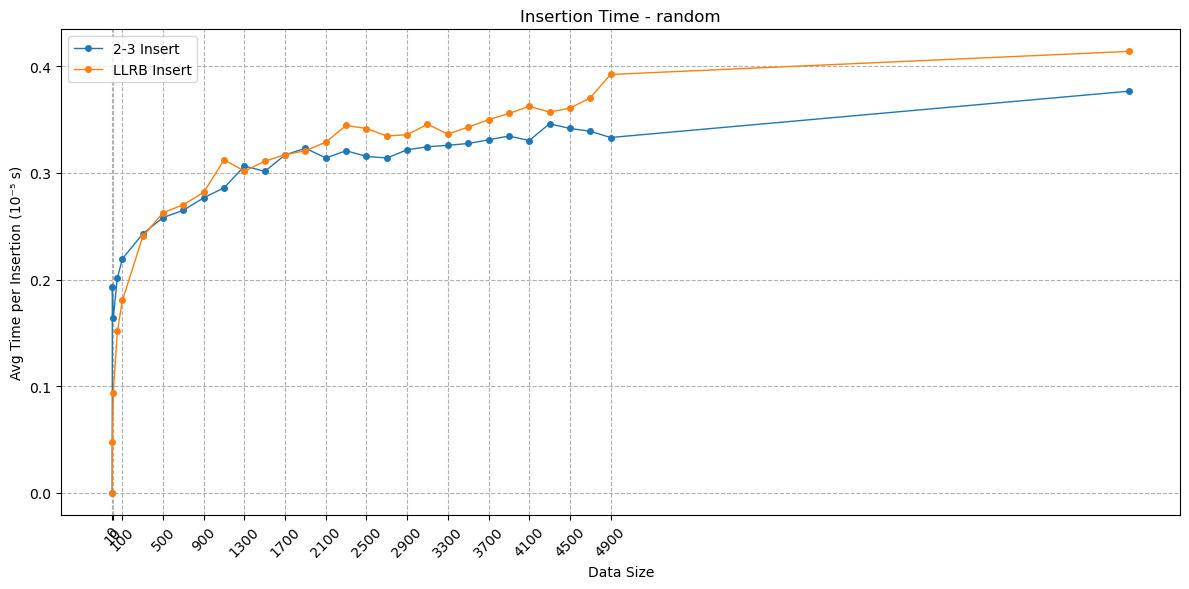

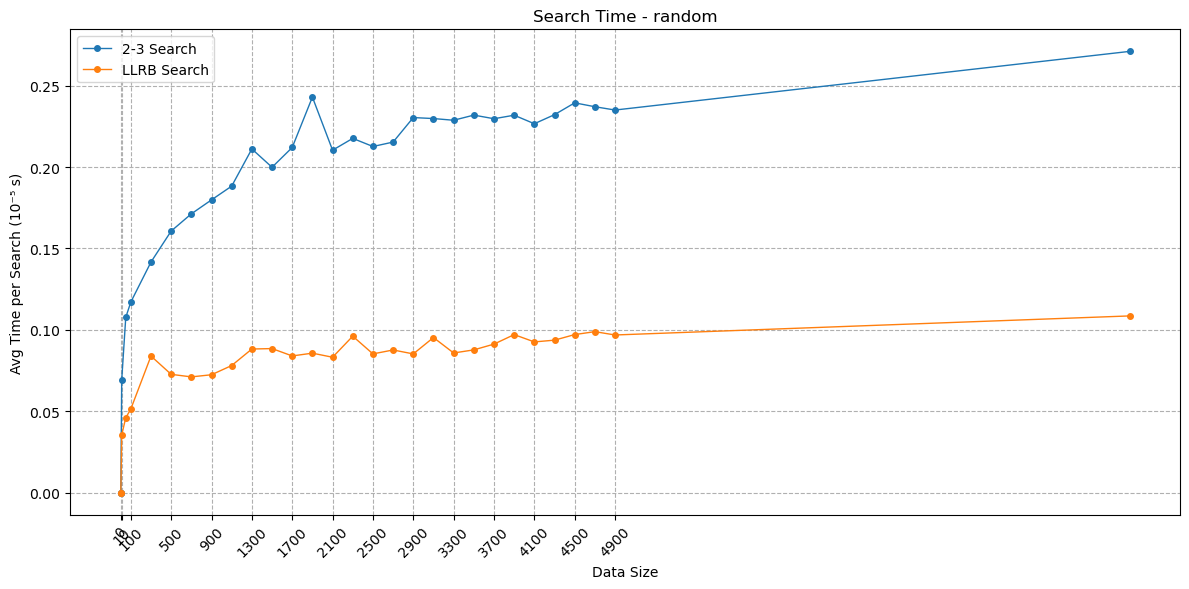

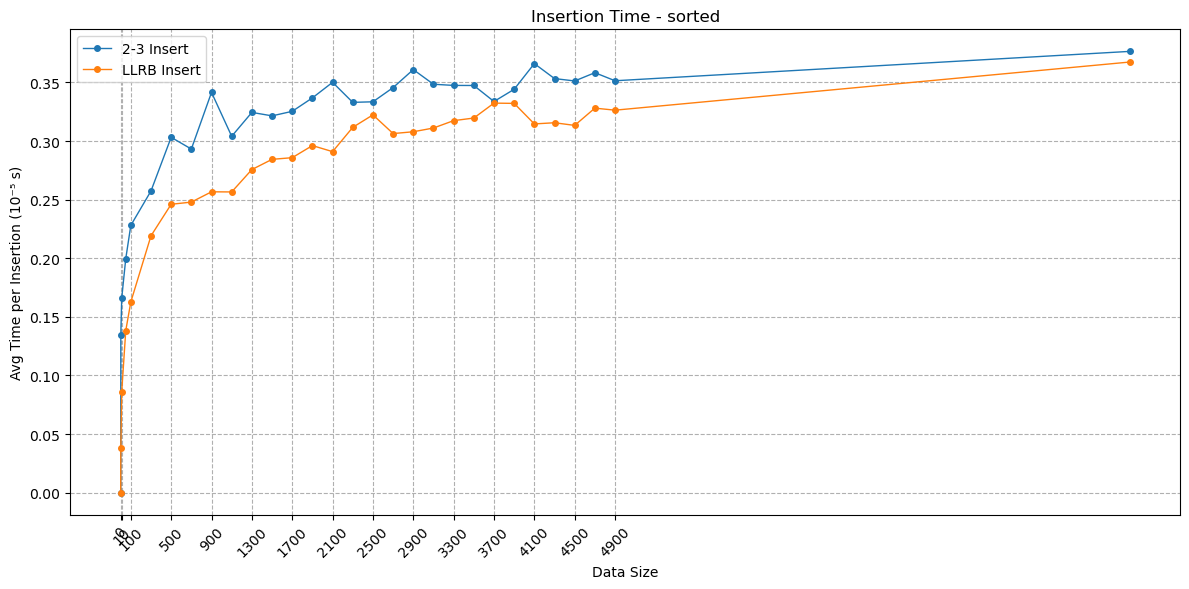

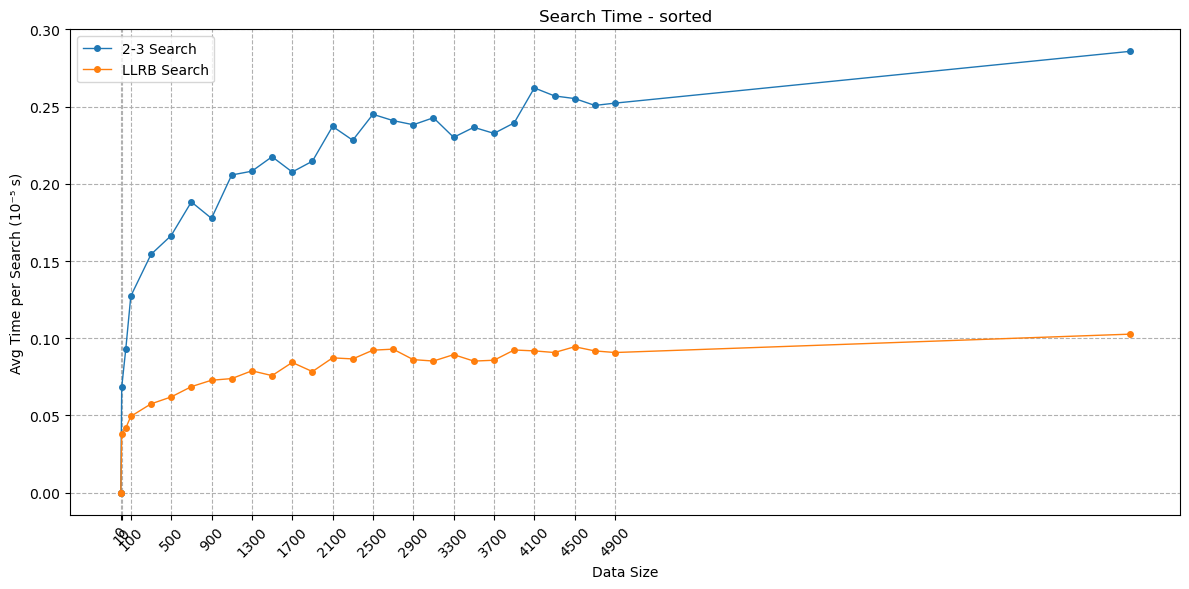

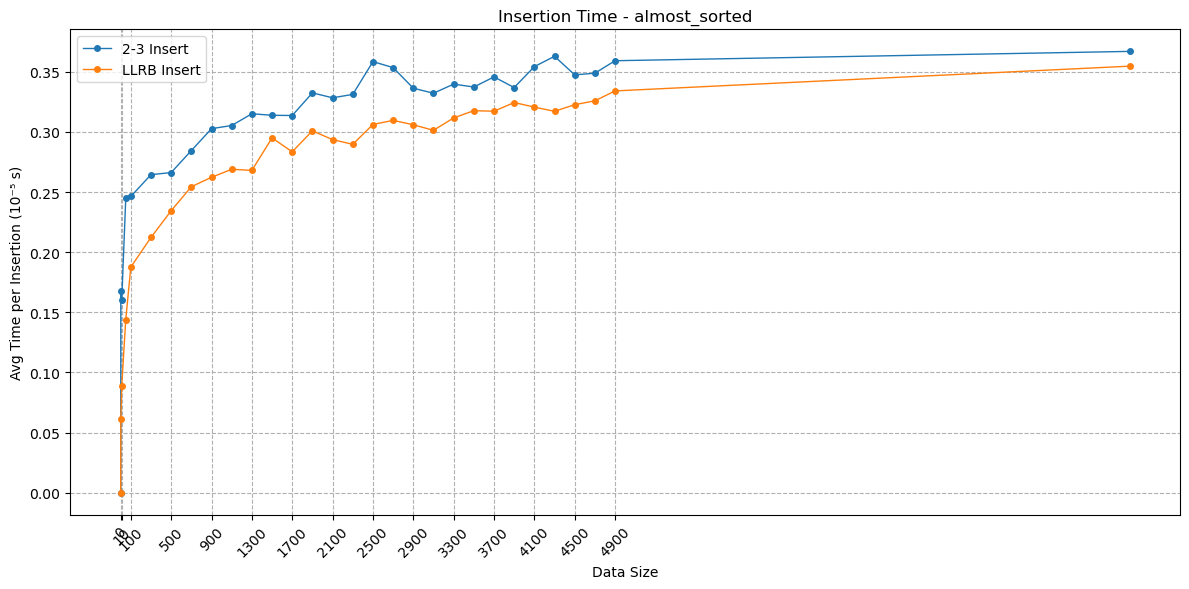

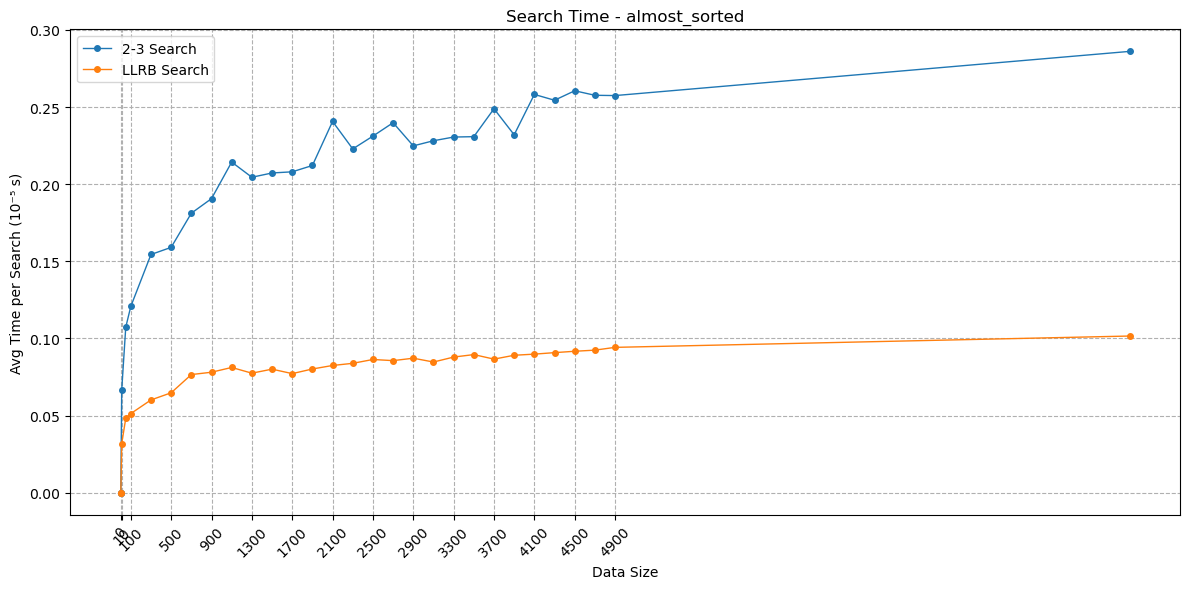

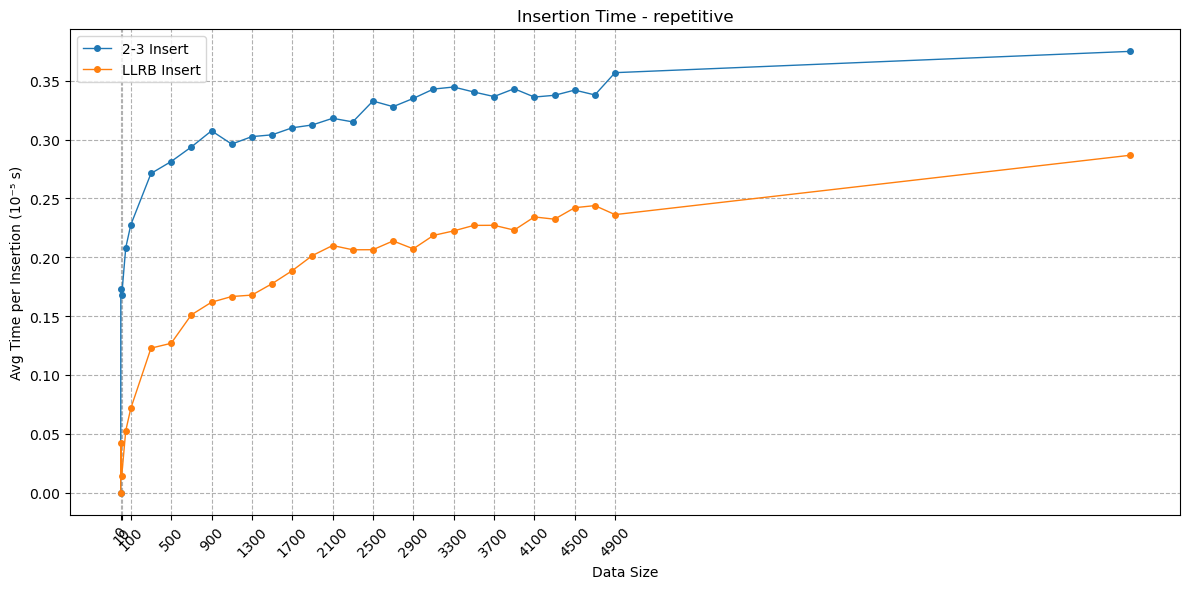

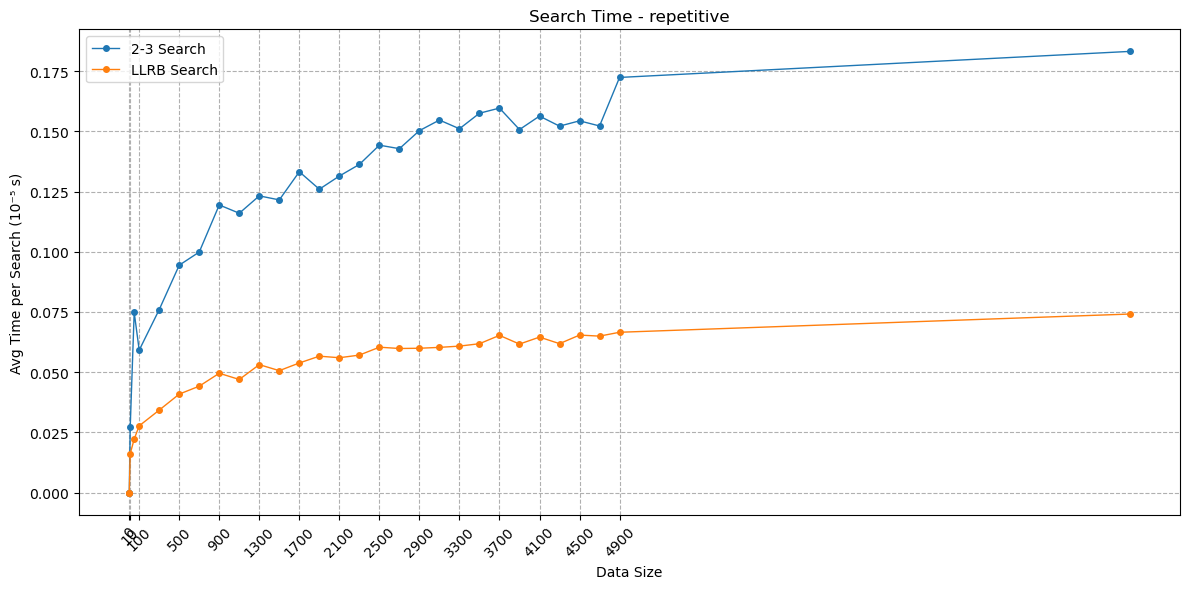

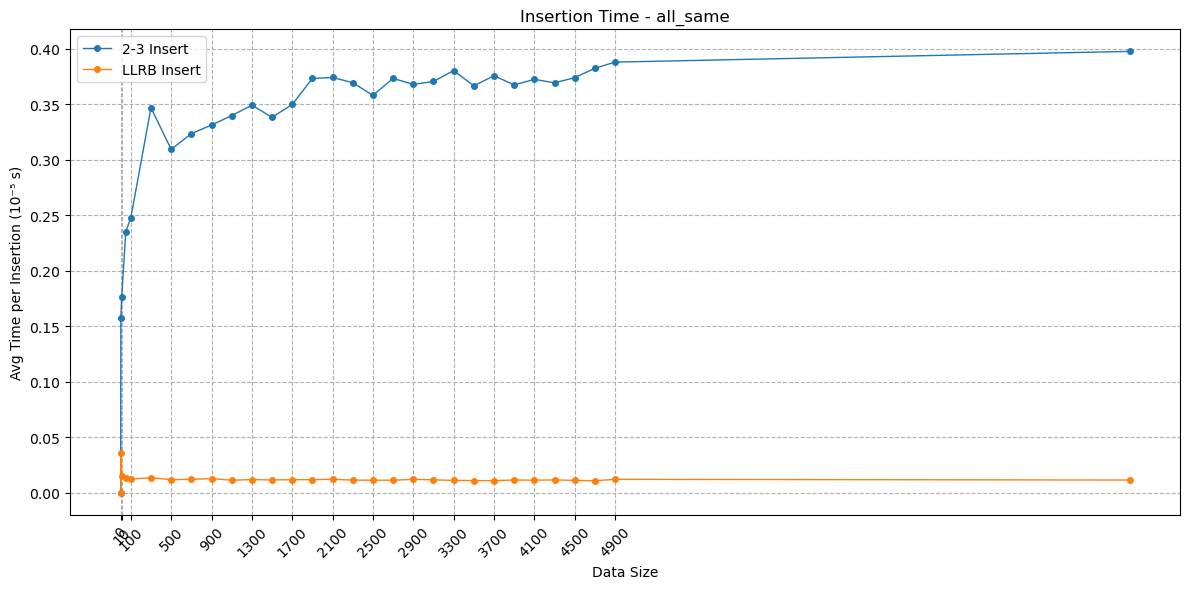

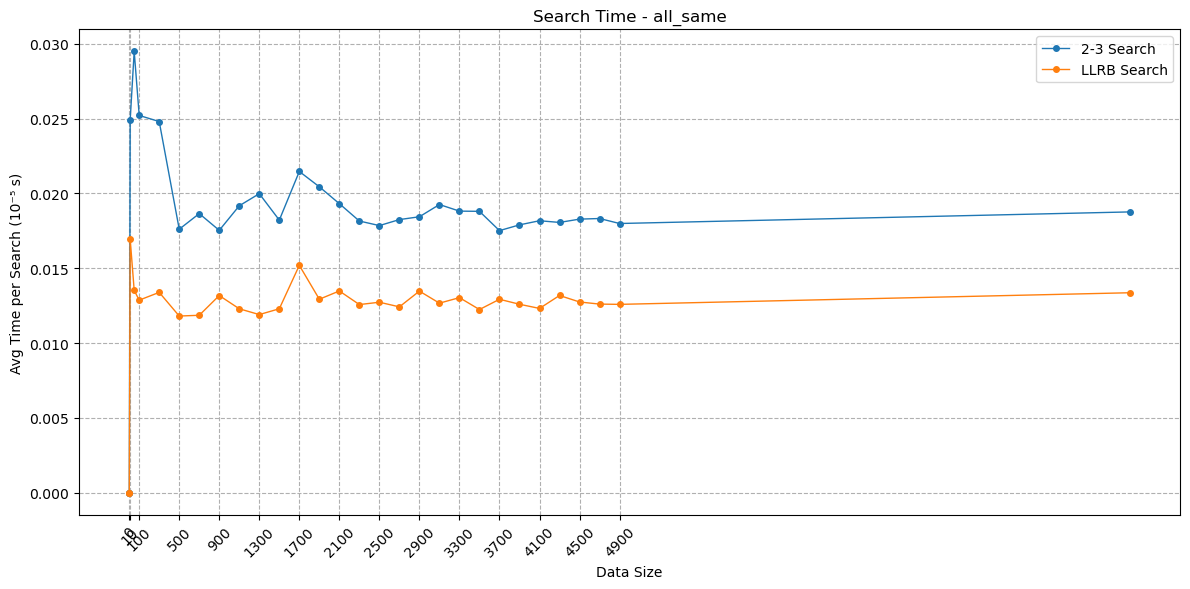

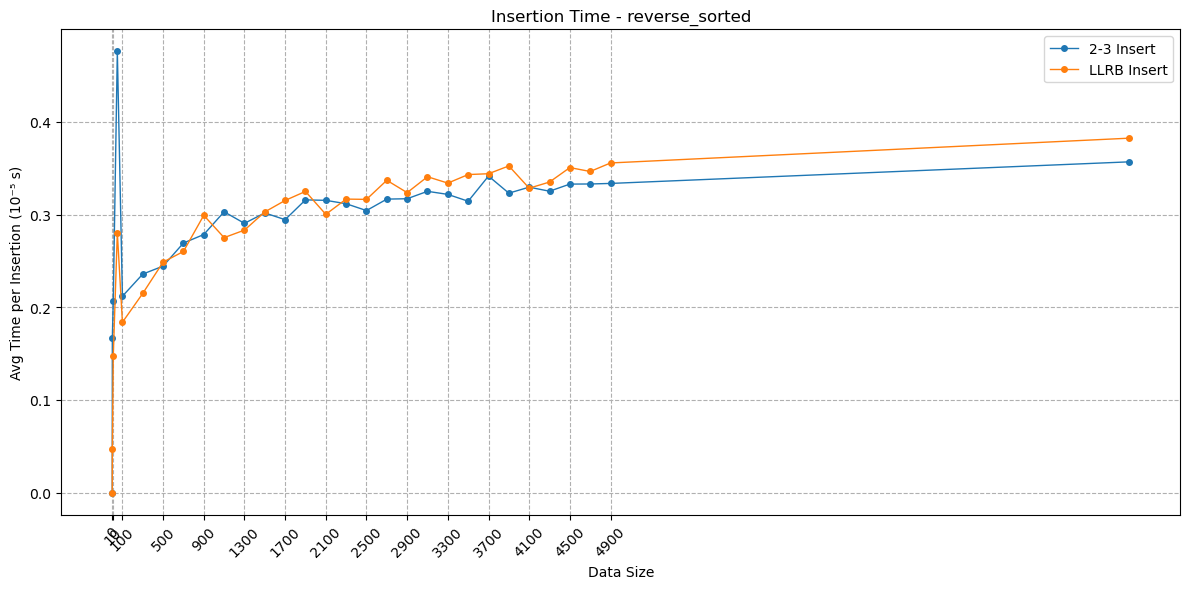

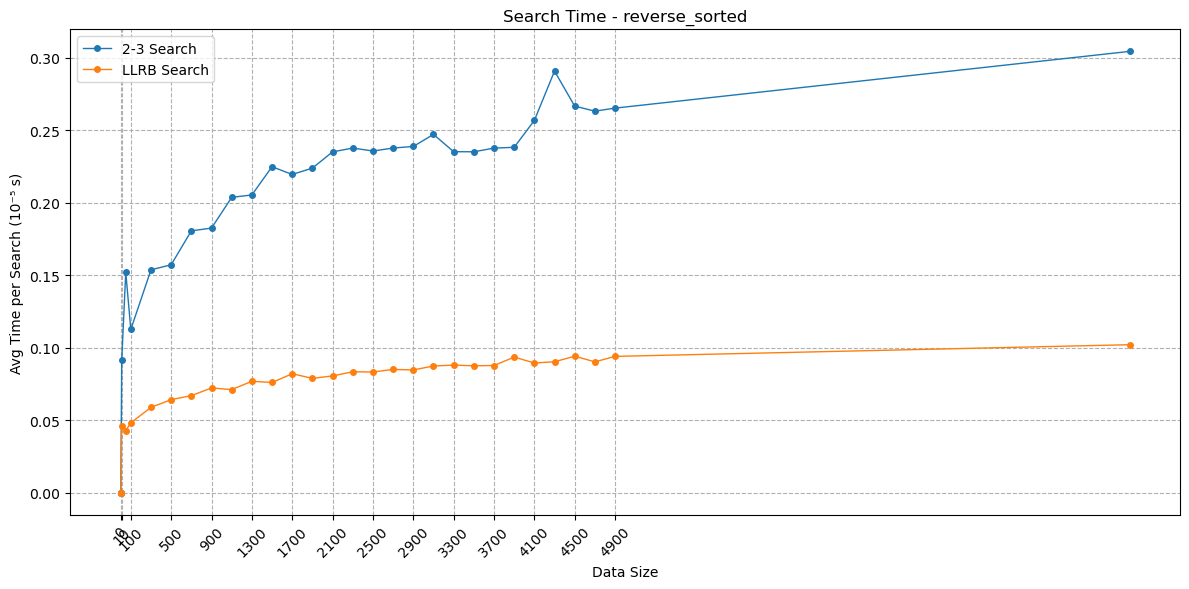

In [ ]:
import matplotlib.pyplot as plt

# Test conditions
distributions = ["random", "sorted", "almost_sorted", "repetitive", "all_same", "reverse_sorted"]
string_length = 8
data_structures = {"2-3": TwoThreeTree, "LLRB": LLRBTree}

# Generate data_sizes with larger step
#data_sizes = list(range(50, 4001, 100))  
data_sizes = [0, 1, 10, 50] + list(range(100, 5001, 200)) + [10000]  # edge case: 0, 1, 10  stress test: 10000

# Store results
all_results = {}

num_trials = 3  
for dist in distributions:
    for size in data_sizes:
        print(f"\n=== {dist}, size={size} ===")
        avg_results = {ds_name: {"ins": [], "search": []} for ds_name in data_structures}
        
        for trial in range(num_trials):
            gen = TestDataGenerator(data_size=size, string_length=string_length, distribution=dist)
            framework = ExperimentalFramework(data_structures, gen, repeat=5)
            framework.run_experiment()  # search_sample_size dunamically adjust
            for ds_name, results in [(n, framework.get_results()) for n in data_structures]:
                avg_results[ds_name]["ins"].append(results["avg_insertion_per_op"][ds_name])
                avg_results[ds_name]["search"].append(results["avg_search_per_op"][ds_name])
                
        all_results[(dist, size)] = {
            ds_name: (sum(avg_results[ds_name]["ins"]) / num_trials,
                      sum(avg_results[ds_name]["search"]) / num_trials)
            for ds_name in data_structures
        }

# Plotting
def plot_results(all_results, data_sizes, distributions, ds_names):
    for dist in distributions:
        # plot insertion
        plt.figure(figsize=(12, 6))
        for ds in ds_names:
            ins_times = [all_results.get((dist, size), {}).get(ds, (0, 0))[0] * 1e5
                         for size in data_sizes]
            plt.plot(data_sizes, ins_times, marker='o', label=f"{ds} Insert", linewidth=1, markersize=4)
        plt.xticks(data_sizes[::2], rotation=45)
        plt.xlabel("Data Size")
        plt.ylabel("Avg Time per Insertion (10⁻⁵ s)")
        plt.title(f"Insertion Time - {dist}")
        plt.legend()
        plt.grid(True, which="both", ls="--")
        plt.tight_layout()
        plt.show()

        # plot search
        plt.figure(figsize=(12, 6))
        for ds in ds_names:
            search_times = [all_results.get((dist, size), {}).get(ds, (0, 0))[1] * 1e5
                            for size in data_sizes]
            plt.plot(data_sizes, search_times, marker='o', label=f"{ds} Search", linewidth=1, markersize=4)
        plt.xticks(data_sizes[::2], rotation=45)
        plt.xlabel("Data Size")
        plt.ylabel("Avg Time per Search (10⁻⁵ s)")
        plt.title(f"Search Time - {dist}")
        plt.legend()
        plt.grid(True, which="both", ls="--")
        plt.tight_layout()
        plt.show()



# Plot
ds_names = list(data_structures.keys())
plot_results(all_results, data_sizes, distributions, ds_names)